## 5.3.4 The Bootstrap

In [9]:
using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, 
DataStructures, NamedArrays, PrettyTables, StatsModels, Combinatorics, CSV


In [10]:
Portfolio = CSV.read("../../../data/Portafolio.csv", DataFrame)

,X,Y
,Float64,Float64
1,-0.895251,-0.234924
2,-1.56245,-0.885176
3,-0.41709,0.271888
4,1.04436,-0.734198
5,-0.315568,0.841983
6,-1.73712,-2.03719
7,1.96641,1.45296
8,2.15287,-0.434139
9,-0.081208,1.45081


In [11]:
function alpha_fn(data,index)
    X = Portfolio[index,:X]
    Y = Portfolio[index,:Y]
    outcome = (var(Y)-cov(X,Y))/(var(X) + var(Y) - 2 * cov(X, Y))
    return outcome
end

alpha_fn (generic function with 1 method)

In [12]:
alpha_fn(Portfolio, [1:100;])

0.5758320745928298

The next command  uses the `sample()` function to randomly select
$100$ observations from the range $1$ to $100$, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$
based on the new data set.

In [13]:
sample([1:100;], 100, replace = true)

100-element Vector{Int64}:
  9
 34
 77
 28
 82
  5
 33
 69
 56
 56
  2
 88
 61
  ⋮
 64
 94
  3
 56
  8
 96
 30
 62
 27
 23
 39
 36

In [14]:
Random.seed!(8)

alpha_fn(Portfolio, sample([1:100;], 100, replace = true))

0.5997647282888492

In [15]:
function boot_1(data,func,R)
            estimates = []
            for i in 1:R
                append!(estimates,func(data,sample([1:100;], 100, replace = true)))
               global a1 = mean(estimates)
               global a2 = std(estimates, corrected=true)  # unbiased std
            end
        bootstrap_statistics = Dict{String,Any}("estimated_value" => a1, "std_error" => a2, "estimates" => estimates)
    return bootstrap_statistics
    
end

boot_1 (generic function with 1 method)

In [16]:
boot_1(Portfolio,alpha_fn,1000)

Dict{String, Any} with 3 entries:
  "estimates"       => Any[0.567899, 0.627954, 0.596899, 0.521895, 0.572153, 0.…
  "estimated_value" => 0.576079
  "std_error"       => 0.0916264

The final output shows that using the original data, $\hat{\alpha}=0.5758$,
and that the bootstrap estimate for ${\rm SE}(\hat{\alpha})$ is $0.0871$.


In [17]:
estimates = boot_1(Portfolio,alpha_fn,1000)["estimates"]

1000-element Vector{Any}:
 0.40774140251863
 0.5870869377949429
 0.5706545164774675
 0.592857936477651
 0.530686147492299
 0.5981739047745334
 0.623923843837301
 0.6168771518633872
 0.6762148382482669
 0.5648001120541998
 0.38520604768379985
 0.49170908635213717
 0.5792966807880815
 ⋮
 0.570998127113853
 0.4102908341680284
 0.4665976774856847
 0.612994296430374
 0.5007237384845337
 0.4292083204021796
 0.5334691800460568
 0.46789917352000554
 0.4149517792339925
 0.6516061574742438
 0.5012157766841092
 0.48936849507951097

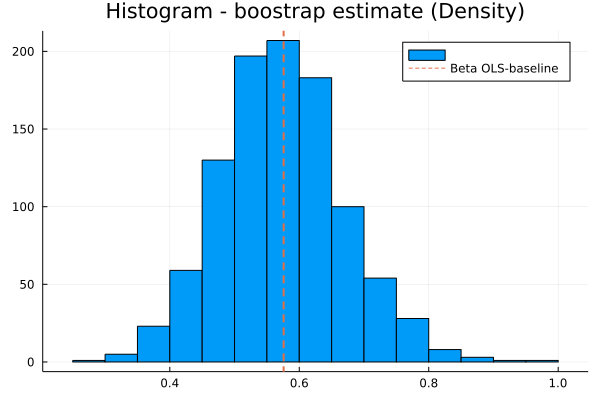

In [41]:
using  Plots

histogram(estimates, label = " ")
plot!( xlim=xlims(), label = " ", title = "Histogram - boostrap estimate (Density)")
vline!( [0.5758320745928298], linestyle = :dash , label = "Beta OLS-baseline", lw=2)

### Estimating the Accuracy of a Linear Regression Model

In [19]:
Auto = CSV.read("../../../data/Auto.csv", DataFrame)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Int64
1,18.0,8,307.0,130,3504,12.0,70,1
2,15.0,8,350.0,165,3693,11.5,70,1
3,18.0,8,318.0,150,3436,11.0,70,1
4,16.0,8,304.0,150,3433,12.0,70,1
5,17.0,8,302.0,140,3449,10.5,70,1
6,15.0,8,429.0,198,4341,10.0,70,1
7,14.0,8,454.0,220,4354,9.0,70,1
8,14.0,8,440.0,215,4312,8.5,70,1
9,14.0,8,455.0,225,4425,10.0,70,1


In [20]:
n = size(Auto)[1]

392

In [21]:
function boot_fn(data,index)
            ols_1 = lm(@formula(mpg ~ horsepower), Auto[index,:])
            intercept = GLM.coeftable(ols_1).cols[1][1]
            coef_1 = GLM.coeftable(ols_1).cols[1][2]
            return [intercept, coef_1]
end

boot_fn (generic function with 1 method)

In [22]:
boot_fn(Auto,[1:392;])

2-element Vector{Float64}:
 39.935861021170474
 -0.15784473335365368

In [23]:
Random.seed!(1)
boot_fn(Auto, sample([1:392;],392, replace = true))

2-element Vector{Float64}:
 39.693012150195166
 -0.1576510461859773

In [24]:
function boot_2(data,func,R)
            intercept = []
            coeff_1 = []
            for i in 1:R
                intercept = append(intercept,func(data,sample([1:392;], n, replace = true))[1])
                append!(coeff_1,func(data,sample([1:392;], n, replace = true))[2])
            end
        table = NamedArray(zeros(2, 3))

        table[1,2] = mean(intercept)
        table[1,3] = std(intercept, corrected=true)
        table[2,2] = mean(coeff_1)
        table[2,3] = std(coeff_1, corrected=true)
        T = DataFrame(table, [ :"Variable", :"Coefficient (boostrap)", :"Standar error (boostrap)"]) 
        T[!,:Variable] = string.(T[!,:Variable]) 

        T[1,1] = "Intercept"
        T[2,1] = "Horsepower"
        
        bootstrap_statistics = Dict{String,Any}("Table" => T, "intercept" => intercept, "Coefficient" => coeff_1)
    return bootstrap_statistics
end

boot_2 (generic function with 1 method)

In [25]:
boot_2(Auto,boot_fn,1000)["Table"]

,Variable,Coefficient (boostrap),Standar error (boostrap)
,String,Float64,Float64
1,Intercept,39.9633,0.807004
2,Horsepower,-0.158113,0.00741841


In [26]:
ols = lm(@formula(mpg ~ horsepower), Auto)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

mpg ~ 1 + horsepower

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  39.9359     0.717499    55.66    <1e-99  38.5252    41.3465
horsepower   -0.157845   0.0064455  -24.49    <1e-80  -0.170517  -0.145172
──────────────────────────────────────────────────────────────────────────

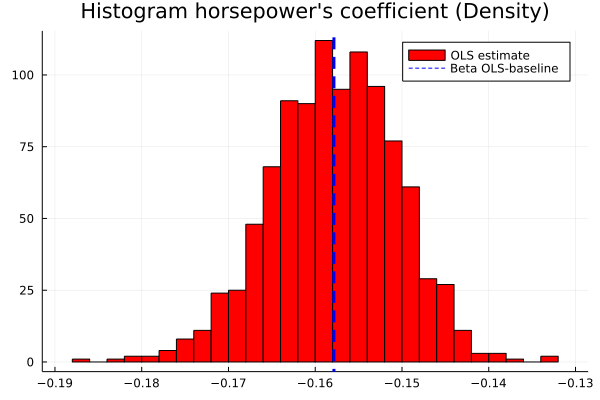

In [27]:
histogram(boot_2(Auto,boot_fn,1000)["Coefficient"], color = "red", label = "OLS estimate")
plot!( xlim=xlims(), title = "Histogram horsepower's coefficient (Density)")
vline!( [-0.157845], linestyle = :dash , label = "Beta OLS-baseline", lw=3, color = "blue")


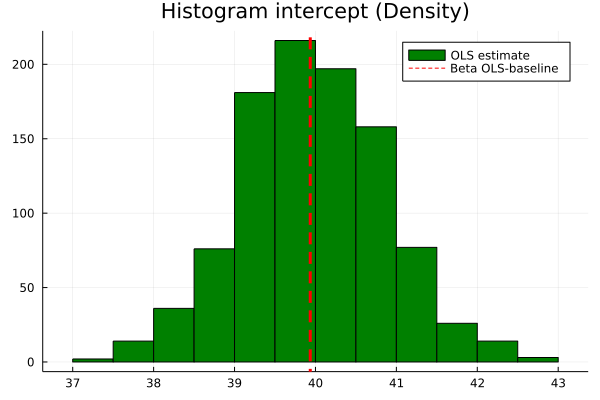

In [28]:
histogram(boot_2(Auto,boot_fn,1000)["intercept"], color = "green", label = "OLS estimate")
plot!( xlim=xlims(),  title = "Histogram intercept (Density)")
vline!( [39.9359], linestyle = :dash , label = "Beta OLS-baseline", lw=3, color = "red")



## 2.0 Second model specification

In [29]:
function boot_fn(data,index)
            ols_1 = lm(@formula(mpg ~ horsepower+horsepower*horsepower), Auto[index,:])
            intercept = GLM.coeftable(ols_1).cols[1][1]
            coef_1 = GLM.coeftable(ols_1).cols[1][2]
            coef_2 = GLM.coeftable(ols_1).cols[1][3]
            return [intercept, coef_1, coef_2]
end

boot_fn (generic function with 1 method)

In [30]:
function boot_3(data,func,R)
            intercept = []
            coeff_1 = []
            coeff_2 = []
            for i in 1:R
                append!(intercept,func(data,sample([1:392;], n, replace = true))[1])
                append!(coeff_1,func(data,sample([1:392;], n, replace = true))[2])
                append!(coeff_2,func(data,sample([1:392;], n, replace = true))[3])
            end
        table = NamedArray(zeros(3, 3))

        table[1,2] = mean(intercept)
        table[1,3] = std(intercept, corrected=true)
        table[2,2] = mean(coeff_1)
        table[2,3] = std(coeff_1, corrected=true)
        table[3,2] = mean(coeff_2)
        table[3,3] = std(coeff_2, corrected=true)
    
        T = DataFrame(table, [ :"Variable", :"Coefficient (boostrap)", :"Standar error (boostrap)"]) 
        T[!,:Variable] = string.(T[!,:Variable]) 

        T[1,1] = "Intercept"
        T[2,1] = "Horsepower"
        T[3,1] = "Horsepower^2"
        
        bootstrap_statistics = Dict{String,Any}("Table" => T, "intercept" => intercept, "Coefficient_1" => coeff_1,
        "Coefficient_2" => coeff_2)
    return bootstrap_statistics
end

boot_3 (generic function with 1 method)

In [31]:
boot_3(Auto,boot_fn,1000)["Table"]

,Variable,Coefficient (boostrap),Standar error (boostrap)
,String,Float64,Float64
1,Intercept,56.9407,2.09189
2,Horsepower,-0.467431,0.0326656
3,Horsepower^2,0.00123349,0.000120782


In [32]:
lm(@formula(mpg ~ horsepower+horsepower*horsepower), Auto)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

mpg ~ 1 + horsepower + horsepower & horsepower

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────────
                               Coef.   Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)              56.9001      1.80043       31.60    <1e-99  53.3603       60.4399
horsepower               -0.46619     0.0311246    -14.98    <1e-39  -0.527383     -0.404996
horsepower & horsepower   0.00123054  0.000122076   10.08    <1e-20   0.000990525   0.00147055
──────────────────────────────────────────────────────────────────────────────────────────────

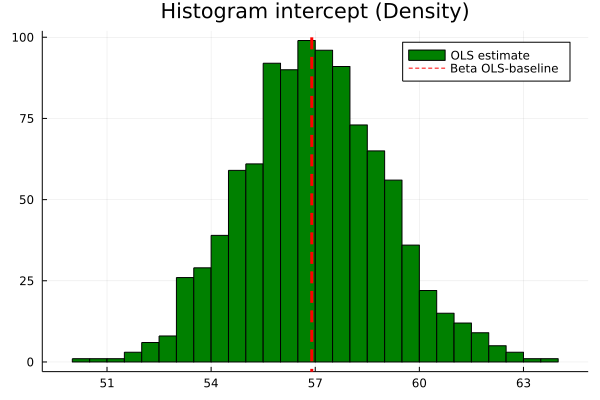

In [33]:
histogram(boot_3(Auto,boot_fn,1000)["intercept"], color = "green", label = "OLS estimate")
plot!( xlim=xlims(),  title = "Histogram intercept (Density)")
vline!( [56.9001], linestyle = :dash , label = "Beta OLS-baseline", lw=3, color = "red")


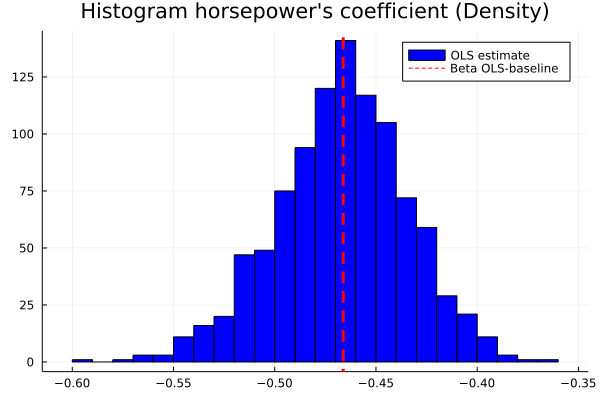

In [34]:

histogram(boot_3(Auto,boot_fn,1000)["Coefficient_1"], color = "blue", label = "OLS estimate")
plot!( xlim=xlims(),  title = "Histogram horsepower's coefficient (Density)")
vline!( [-0.46619], linestyle = :dash , label = "Beta OLS-baseline", lw=3, color = "red")


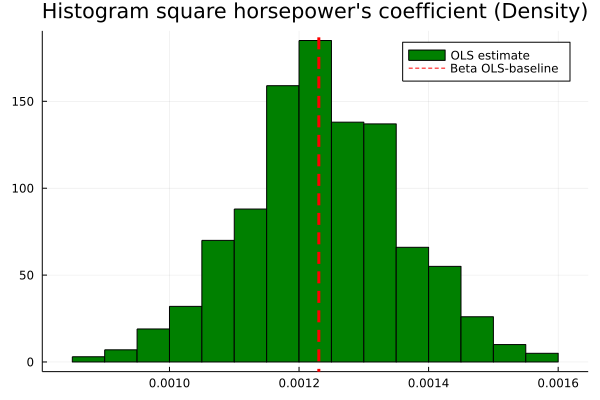

In [35]:
histogram(boot_3(Auto,boot_fn,1000)["Coefficient_2"], color = "green", label = "OLS estimate")
plot!( xlim=xlims(),  title = "Histogram square horsepower's coefficient (Density)")
vline!( [0.00123054], linestyle = :dash , label = "Beta OLS-baseline", lw=3, color = "red")
